In [15]:
import pandas as pd

In [16]:
file_path = 'C:/Users/molug/Downloads/FinancialFigures.csv'
df = pd.read_csv(file_path)

print(df.head())

     Company  Fiscal Year Total Revenue Net Income Total Assets  \
0  Microsoft         2025      $281,724   $101,832     $619,003   
1  Microsoft         2024      $245,122    $88,136     $512,163   
2  Microsoft         2023      $211,915    $72,361     (Varies)   
3      Tesla         2024       $97,690     $7,091     $122,070   
4      Tesla         2023       $96,773    $14,997     $106,618   

  Total Liabilities Cash Flow from Operations  
0          $275,524                  $136,162  
1          $243,686                  $118,548  
2          (Varies)                   $87,582  
3           $48,390                   $14,923  
4           $43,009                   $13,256  


In [17]:
# Cleaning and Converting Data

# List of columns that need cleaning
numeric_cols = [
    'Total Revenue', 'Net Income', 'Total Assets',
    'Total Liabilities', 'Cash Flow from Operations'
]

# Step 1: Remove special characters like '$' and ','
for col in numeric_cols:
    df[col] = df[col].astype(str)
    df[col] = df[col].str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# Step 2: Now, convert the clean columns to a numeric type
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check the info again. You should see non-zero counts now.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company                    9 non-null      object 
 1   Fiscal Year                9 non-null      int64  
 2   Total Revenue              9 non-null      int64  
 3   Net Income                 9 non-null      int64  
 4   Total Assets               6 non-null      float64
 5   Total Liabilities          6 non-null      float64
 6   Cash Flow from Operations  9 non-null      int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 636.0+ bytes
None


In [18]:
# Calculating Year-Over-Year (YoY) Revenue Growth

# Sort the data to ensure correct YoY calculation
df = df.sort_values(by=['Company', 'Fiscal Year'])

# Calculate the percentage change for revenue
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue'].pct_change() * 100

# Display the new column
print(df[['Company', 'Fiscal Year', 'Total Revenue', 'Revenue Growth (%)']])

     Company  Fiscal Year  Total Revenue  Revenue Growth (%)
8      Apple         2022         394328                 NaN
7      Apple         2023         383285           -2.800461
6      Apple         2024         391035            2.021994
2  Microsoft         2023         211915                 NaN
1  Microsoft         2024         245122           15.669962
0  Microsoft         2025         281724           14.932156
5      Tesla         2022          81462                 NaN
4      Tesla         2023          96773           18.795267
3      Tesla         2024          97690            0.947578


In [19]:
# Net Income Growth Calculation

# Calculate the percentage change for net income
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income'].pct_change() * 100

# Display both growth columns to compare
print(df[['Company', 'Fiscal Year', 'Revenue Growth (%)', 'Net Income Growth (%)']])

     Company  Fiscal Year  Revenue Growth (%)  Net Income Growth (%)
8      Apple         2022                 NaN                    NaN
7      Apple         2023           -2.800461              -2.813543
6      Apple         2024            2.021994              -3.359967
2  Microsoft         2023                 NaN                    NaN
1  Microsoft         2024           15.669962              21.800417
0  Microsoft         2025           14.932156              15.539621
5      Tesla         2022                 NaN                    NaN
4      Tesla         2023           18.795267              19.440905
3      Tesla         2024            0.947578             -52.717210


In [20]:
# Debt-to-Asset Ratio calculation

df['Debt_to_Asset_Ratio'] = df['Total Liabilities'] / df['Total Assets']

print(df[['Company', 'Fiscal Year', 'Debt_to_Asset_Ratio']])

     Company  Fiscal Year  Debt_to_Asset_Ratio
8      Apple         2022                  NaN
7      Apple         2023             0.823741
6      Apple         2024             0.843964
2  Microsoft         2023                  NaN
1  Microsoft         2024             0.475798
0  Microsoft         2025             0.445109
5      Tesla         2022                  NaN
4      Tesla         2023             0.403393
3      Tesla         2024             0.396412


In [21]:
# Return on Assets (ROA) Calculation

df['Return_on_Assets'] = df['Net Income'] / df['Total Assets']

# Let's look at both ratios together
print(df[['Company', 'Fiscal Year', 'Debt_to_Asset_Ratio', 'Return_on_Assets']])

     Company  Fiscal Year  Debt_to_Asset_Ratio  Return_on_Assets
8      Apple         2022                  NaN               NaN
7      Apple         2023             0.823741          0.275098
6      Apple         2024             0.843964          0.256825
2  Microsoft         2023                  NaN               NaN
1  Microsoft         2024             0.475798          0.172086
0  Microsoft         2025             0.445109          0.164510
5      Tesla         2022                  NaN               NaN
4      Tesla         2023             0.403393          0.140661
3      Tesla         2024             0.396412          0.058090


In [22]:
# Visualizing the Data

import seaborn as sns
import matplotlib.pyplot as plt

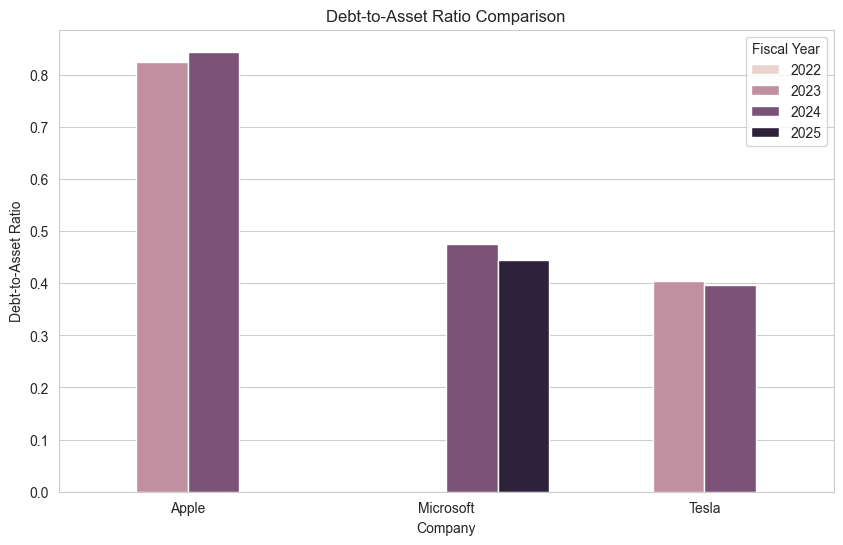

In [23]:
# Set a nice style for the chart
sns.set_style("whitegrid")

# Create the bar chart
plt.figure(figsize=(10, 6)) # Adjusts the size of the plot
sns.barplot(data=df, x='Company', y='Debt_to_Asset_Ratio', hue='Fiscal Year')
plt.title('Debt-to-Asset Ratio Comparison') 
plt.ylabel('Debt-to-Asset Ratio') # Adds a label to the y-axis
plt.show() # Displays the plot

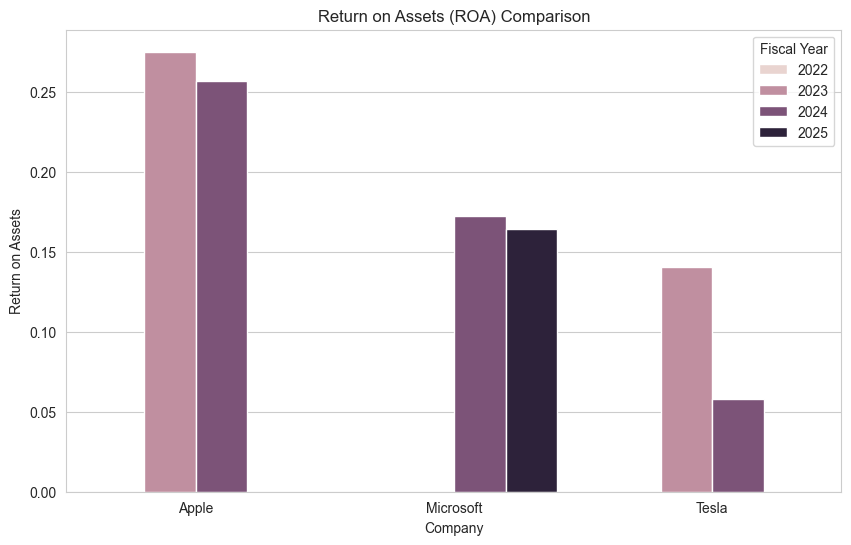

In [24]:
# Bar chart for Return on Assets
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Company', y='Return_on_Assets', hue='Fiscal Year')
plt.title('Return on Assets (ROA) Comparison')
plt.ylabel('Return on Assets')
plt.show()

# Final Analysis: A Comparative Look at Apple, Microsoft, and Tesla

## Introduction
This analysis was conducted to compare the financial health, strategy, and recent performance of three major technology companies: Apple, Microsoft, and Tesla. The findings are based on data extracted from their 10-K filings, focusing on key financial ratios and year-over-year growth trends.

---

## Company Deep Dive

### 1. Apple
* **Financial Strategy:** Apple pursues a **high-leverage** strategy. It uses a significant amount of debt to finance its operations, as shown by a Debt-to-Asset ratio of approximately **[84.3]%**. Despite this high debt load, the company is extremely efficient at generating profit, leading its peers with a Return on Assets (ROA) of **[25.6]%**.

* **Growth Trends:** Apple's recent growth has shown signs of slowing. For the most recent fiscal year (2024), its revenue grew by a modest **[2.02 %]**, while its net income saw a decline of **[3.3 %]**. This suggests the company is maturing and may be facing market saturation.

### 2. Microsoft 
* **Financial Strategy:** Microsoft employs a **balanced and stable** strategy. It maintains a moderate Debt-to-Asset ratio of around **[44.5 ]%**, indicating less reliance on debt than Apple. This is coupled with a strong and consistent Return on Assets of **[16.4]%**, showcasing efficient and lower-risk profit generation.

* **Growth Trends:** Microsoft has demonstrated robust and consistent growth. In the most recent fiscal year (2025), it posted double-digit growth in both revenue (**[14.9 % ]**) and net income **[ 15.5 %]**. This highlights the continued strength of its business segments, particularly in cloud computing.

### 3. Tesla 
* **Financial Strategy:** Tesla's strategy appears more conservative in its financing, with the lowest Debt-to-Asset ratio of the group at approximately **[39.6]%**. Its profitability, as measured by Return on Assets, was **[5.8]%**.

* **Growth Trends:** Tesla's growth story is the most dramatic. After a strong 2023, the most recent fiscal year (2024) saw a significant slowdown. Revenue growth was nearly flat at **[ 0.94  %]**. More alarmingly, net income plummeted by **[-52.7%]**. This sharp decline in profitability, despite stable sales, suggests the company is facing significant challenges with its costs, pricing power, or operational efficiency.


## Conclusion
The analysis reveals three distinct corporate strategies. Apple uses high leverage to achieve market-leading returns. Microsoft demonstrates a model of stable, lower-risk growth. Tesla, once a high-growth story, is now showing signs of significant financial pressure. Based on the data, the most compelling strategy depends on investment philosophy: **While Apple's high-leverage model is impressive, Microsoft's more conservative strategy, which delivers stable growth with less risk, is arguably the more interesting approach to long-term value creation.**.